Using TensorFlow backend.


(1889, 2400, 3)

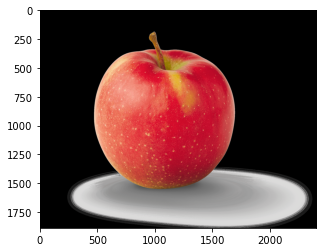

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import RMSprop, Adam, SGD
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import warnings
warnings.filterwarnings("ignore")
img = image.load_img("apple/train/apples/apple_1.png")
plt.imshow(img)
cv2.imread("apple/train/apples/apple_1.png").shape

In [3]:
train = ImageDataGenerator(rescale = 1/255,
                           zca_whitening=True,
                           zca_epsilon=1e-06,
                           rotation_range=30,
                          width_shift_range=0.5,
                          height_shift_range=0.5,
                          brightness_range=None,
                           shear_range = 0.5,
                           horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1/255,
                                featurewise_center=True,
                                samplewise_center=True,
                                featurewise_std_normalization=True,
                                samplewise_std_normalization=True,
                                zca_whitening=True,
                                zca_epsilon=1e-06,
                                rotation_range=30,
                                width_shift_range=0.5,
                                height_shift_range=0.5,
                                brightness_range=None,
                                shear_range = 0.5,
                                horizontal_flip = True)

train_dataset = train.flow_from_directory("C:/Users/rimib/Downloads/apple/train",
                                          target_size = (250,250),
                                          batch_size = 64,
                                          class_mode = 'binary')
validation_dataset = validation.flow_from_directory("C:/Users/rimib/Downloads/apple/validation",
                                                    target_size = (250,250),
                                                    batch_size = 64,
                                                    class_mode = 'binary')
train_dataset.class_indices

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters = 64, 
                                                           kernel_size = (7,7),
                                                           strides = (2,2), 
                                                           activation = "relu",
                                                           input_shape = (250,250,3),
                                                           padding = "same"),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
                                    tf.keras.layers.Conv2D(filters = 128,
                                                           kernel_size = (7,7),
                                                           strides = (2,2), 
                                                           activation = "relu",
                                                           padding = "same"),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
                                    tf.keras.layers.Conv2D(filters = 256,
                                                           kernel_size = (7,7),
                                                           strides = (2,2), 
                                                           activation = "relu",
                                                           padding = "same"),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = "relu"),
                                    tf.keras.layers.Dense(1,activation = "sigmoid")
                                    ])
model.summary()
model.compile(loss = tf.keras.losses.MeanSquaredError(),
             optimizer = "adam",
             metrics = ["accuracy"])
history = model.fit(train_dataset,
                    epochs = 15,
                    validation_data = validation_dataset,
                    verbose = 1)

print(history.history.keys())

Found 5 images belonging to 2 classes.
Found 3 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         1605888   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
____________________________________________

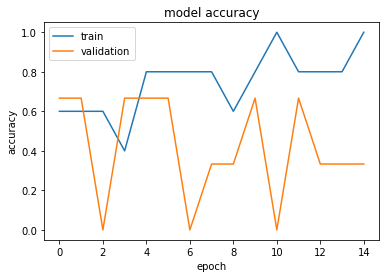

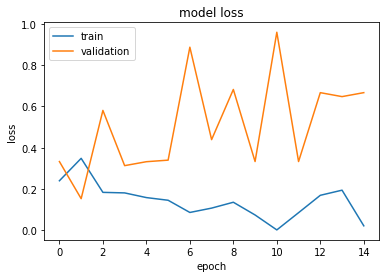

In [4]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

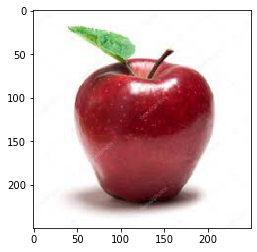

its not an apple


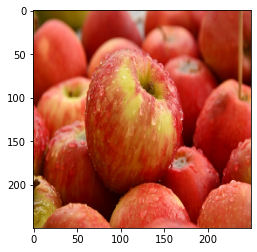

its an apple!


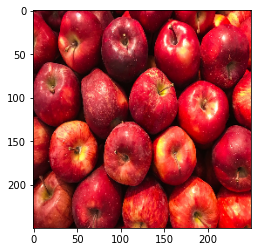

its an apple!


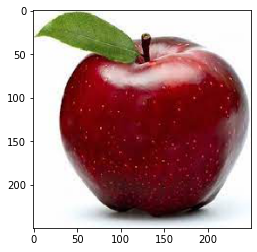

its not an apple


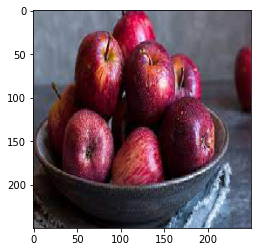

its not an apple


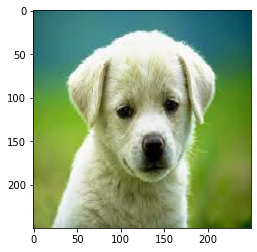

its not an apple


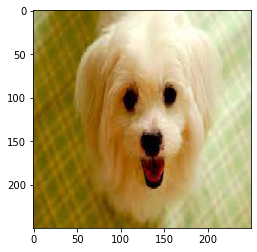

its not an apple


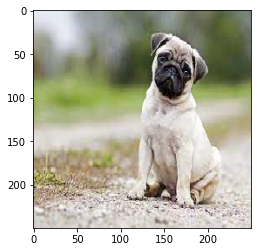

its not an apple


In [5]:
test_path = 'apple/test'
for i in os.listdir(test_path):
    img = image.load_img(test_path +'/'+ i, target_size = (250,250))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    val = model.predict(images)
    if val == 0:
        print("its an apple!")
    else:
        print("its not an apple")